In [3]:
import torch
from torch.utils.data import DataLoader,Dataset,ConcatDataset
import glob
from PIL import Image
import torchvision.transforms.functional as TF
import xml.etree.ElementTree as ET
import numpy as np
from torchvision import transforms

In [78]:
class NimbroSegmentDataset(Dataset):
    def __init__(self,image_dir,image_size):
        self.input_files = glob.glob(image_dir+'image/*.*')
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
        self.resize_inp = transforms.Compose([transforms.ToPILImage(),transforms.Resize(image_size),transforms.ToTensor()])
        self.resize_op = transforms.Compose([transforms.ToPILImage(),transforms.Resize((image_size[0]//4,image_size[1]//4)),transforms.ToTensor()])

    def __getitem__(self,index):
        f = self.input_files[index]
        print(f)
        x = Image.open(f)
        target_path = f.replace('image','target').replace('jpg','png')
        target = Image.open(target_path)
        x = TF.to_tensor(x)
        target_single_channel = TF.to_tensor(target)
        
        target_0 = torch.zeros_like(target_single_channel)
        target_0[target_single_channel.min() == target_single_channel] = 1
        
        target_1 = torch.zeros_like(target_single_channel)
        target_1[(target_single_channel.min() < target_single_channel) & (target_single_channel.max() > target_single_channel)] = 1
        
        target_2 = torch.zeros_like(target_single_channel)
        target_2[target_single_channel.max() == target_single_channel] = 1
    
        target = torch.stack([target_0.squeeze(),target_1.squeeze(),target_2.squeeze()])
        
        x = self.resize_inp(x)
        x = self.normalize(x)
        target = self.resize_op(target)
        return x,target
    def __len__(self):
        return len(self.input_files)

In [82]:
dataset1 = NimbroSegmentDataset('data/bigcuda5.informatik.uni-bonn.de:8686/segmentation/forceTrain/',(480,640))
dataset2 = NimbroSegmentDataset('data/bigcuda5.informatik.uni-bonn.de:8686/segmentation/dataset/',(480,640))

data/bigcuda5.informatik.uni-bonn.de:8686/segmentation/forceTrain/image/2019-07-05-01-22-38-816.jpg


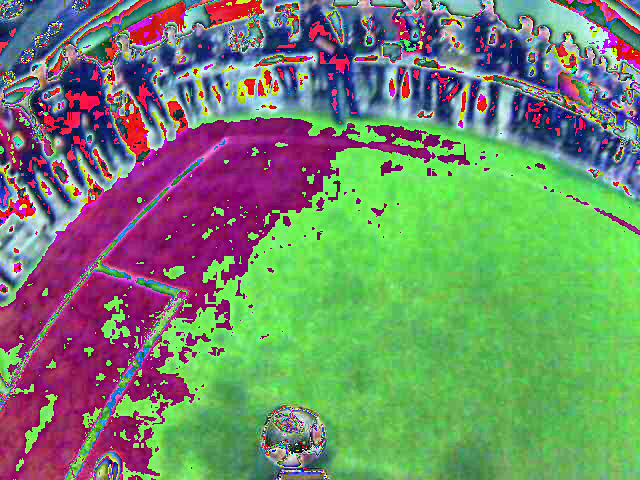

In [80]:
TF.to_pil_image(dataset1[50][0])

data/bigcuda5.informatik.uni-bonn.de:8686/segmentation/forceTrain/image/2019-07-05-01-22-38-816.jpg


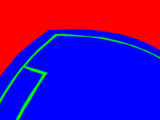

In [81]:
TF.to_pil_image(dataset1[50][1])

In [38]:
t = TF.to_tensor(Image.open('data/bigcuda5.informatik.uni-bonn.de:8686/segmentation/forceTrain/target/2019-07-07-08-36-59-067.png')) 

In [51]:
[(t < t.max()) & (t > t.min())]

[tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]]])]